In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
dados = pd.read_csv('diarias_e_passagens.csv', sep=',', encoding='ISO-8859-1', header=None)

In [3]:
dados.columns = 'CARGO NOME SAÍDA CHEGADA DESTINO QUANTIDADE VALOR MOTIVO'.split()

### Conversão dos Valores

In [4]:
def clear_value(x):    
    x = x.replace(',','.')
    return float(x)

In [5]:
dados['VALOR'] = dados['VALOR'].apply(lambda x: clear_value(x))

### Ajuste de Datas

In [6]:
def clear_dates(x):
    dia = int(x[:2])
    mes = int(x[3:5])
    ano = int(x[6:10])
    
    data = datetime(ano, mes, dia)
    
    return data

In [7]:
dados['SAÍDA'] = dados['SAÍDA'].apply(lambda x: clear_dates(x))

In [8]:
dados['CHEGADA'] = dados['CHEGADA'].apply(lambda x: clear_dates(x))

### Dados agrupados por Cargo

In [9]:
cargos = dados['CARGO'].value_counts()
cargos

MOTORISTA                                             895
Secretario (a) Mun. de Saude                          297
Assessor (a) de Secretaria                            119
Continuo                                               66
Assessor (a) de Departamento                           55
Diretor (a) do Departamento Administrativo             29
Coordenador (a) de Gestao de Pessoas                   25
CONTADOR (A)                                           18
SERVENTE                                               17
Assistente Social                                      15
Conselheiro Tutelar                                    13
Chefe Div. Protocolo e Arguivo Geral                   10
Dir do Depto de Almox, Patrimônio e Serv. Gerais       10
Assistente Administrativo                               7
Diretor do Departamento Contabilidade                   7
Secretario Municipal de Ordem Urbana                    5
Docente I  Classe B                                     5
DIRETOR(A) DEP

### Quantidade de Motoristas

In [10]:
dados[dados['CARGO'] == 'MOTORISTA']['NOME'].nunique()

18

### Quantidade de viagens por motorista

In [11]:
dados[dados['CARGO'] == 'MOTORISTA']['NOME'].value_counts()

ARI DA SILVA                        147
DARIO DE BRITO                      144
LUCIO MAURO RODRIGUES DE SOUSA      132
BARBARA MARQUES DA SILVA            125
SEBASTIAO BATISTA DE PAULA COSTA    111
RONILDO MOREIRA DE AZEVEDO           96
JOSE ADALBERTO NOGUEIRA DENEGRI      93
ALTAMIR CAMPBELL MOREIRA             23
FLAVIO DA COSTA                       7
DEYVISON DE ASSIS                     6
EDSON BERNARDES PENIDO                3
RINALDO VELOSO                        2
CLAUDIO LUDUCENE BARBOSA              1
VICENTE CAMILO DE OLIVEIRA            1
FELIPE RODOLFO AREDES DA SILVA        1
MARCO ANTONIO JUNQUEIRA FONSECA       1
IVO COSTA MOREIRA                     1
ALEXANDRE GARCIA DA SILVA             1
Name: NOME, dtype: int64

### Valor total gasto em viajens para o cargo de motorista

In [12]:
dados[dados['CARGO'] == 'MOTORISTA']['VALOR'].sum()

47009.44

### Valor total gasto por motorista

In [13]:
motoristas = dados[dados['CARGO'] == 'MOTORISTA'].loc[:, ['NOME','VALOR']].groupby('NOME').sum().sort_values(by='VALOR')

In [14]:
motoristas

,VALOR
NOME,
VICENTE CAMILO DE OLIVEIRA,58.88
FELIPE RODOLFO AREDES DA SILVA,60.90
MARCO ANTONIO JUNQUEIRA FONSECA,63.62
ALEXANDRE GARCIA DA SILVA,76.12
CLAUDIO LUDUCENE BARBOSA,79.52
RINALDO VELOSO,108.24
IVO COSTA MOREIRA,206.08
EDSON BERNARDES PENIDO,213.14
FLAVIO DA COSTA,282.21


### Valores gastos por Cargo

In [15]:
gastos = dados.groupby('CARGO')['VALOR'].sum().sort_values()

In [16]:
gastos

CARGO
CH DA DIV DE PROTECAO SOCIAL BASICA E ESPECIAL           30.45
Docente II  Classe B                                     30.45
Aux Obras e Serv. Publico                                58.88
Dir. Dep. Pessoal e Rec Humanos                          58.88
Dir. do Departamento de Informática                      58.88
DIR DEPTO DE POLITICAS PUBL EM DIR HUMANOS               60.90
Ch da Div de Rec Humanos, Almox e Patrim                 60.90
Ch. da Div. de Progr. de Benef. e Transf. de Renda       60.90
Coordenador(a) do Fundo Municipal de Saúde               63.62
Fiscal de Saude                                          63.62
Secretário Municipal de Governo                          76.12
Operador de ETA                                          76.12
Docente III  - Inspetor de Escolar - Classe C            76.12
DOCENTE III Classe C - Orientador Pedagogico            106.57
Auxiliar Administrativo                                 135.00
Psicologo                                        

### Valor Total

In [17]:
dados['VALOR'].sum()

92908.22

# Análise das datas

### Gastos por ano

In [18]:
gastos_2016 = dados[(dados['SAÍDA'] >= datetime(2016, 1, 1)) & (dados['SAÍDA'] <= datetime(2016, 12, 31))]
gastos_2017 = dados[(dados['SAÍDA'] >= datetime(2017, 1, 1)) & (dados['SAÍDA'] <= datetime(2017, 12, 31))]
gastos_2018 = dados[(dados['SAÍDA'] >= datetime(2018, 1, 1)) & (dados['SAÍDA'] <= datetime(2018, 12, 31))]
gastos_2019 = dados[(dados['SAÍDA'] >= datetime(2019, 1, 1)) & (dados['SAÍDA'] <= datetime(2019, 12, 31))]
gastos_2020 = dados[(dados['SAÍDA'] >= datetime(2020, 1, 1)) & (dados['SAÍDA'] <= datetime(2020, 12, 31))]

In [19]:
print('Gastos com Passagens e Diárias em 2016 R$ ', gastos_2016['VALOR'].sum())
print('Gastos com Passagens e Diárias em 2017 R$ ', gastos_2017['VALOR'].sum())
print('Gastos com Passagens e Diárias em 2018 R$ ', gastos_2018['VALOR'].sum())
print('Gastos com Passagens e Diárias em 2019 R$ ', gastos_2019['VALOR'].sum())
print('Gastos com Passagens e Diárias em 2020 R$ ', gastos_2020['VALOR'].sum())

print("\nTotal: R$ ", dados['VALOR'].sum())

Gastos com Passagens e Diárias em 2016 R$  4302.54
Gastos com Passagens e Diárias em 2017 R$  0.0
Gastos com Passagens e Diárias em 2018 R$  26042.200000000004
Gastos com Passagens e Diárias em 2019 R$  46992.67
Gastos com Passagens e Diárias em 2020 R$  15570.810000000001

Total: R$  92908.22


## Gastos por ano e cargo

### 2016

In [20]:
resumo_2016 = gastos_2016.groupby('CARGO')['VALOR'].sum().sort_values()
resumo_2016

CARGO
Assistente Administrativo                270.60
Cozinheiro (a)                           270.60
Chefe Div. Protocolo e Arguivo Geral     541.20
Assessor (a) de Secretaria               541.20
Dir. Dep. de Tributos                    541.20
MOTORISTA                               2137.74
Name: VALOR, dtype: float64

### 2017

In [21]:
resumo_2017 = gastos_2017.groupby('CARGO')['VALOR'].sum().sort_values()
resumo_2017

Series([], Name: VALOR, dtype: float64)

### 2018

In [22]:
resumo_2018 = gastos_2018.groupby('CARGO')['VALOR'].sum().sort_values()
resumo_2018

CARGO
DIRETOR(A) DEPTO DE CONTR INTERNO                      29.44
Diretor do Departamento Contabilidade                  58.88
Dir. do Departamento de Informática                    58.88
Aux Obras e Serv. Publico                              58.88
Auxiliar Administrativo                                58.88
Dir. Dep. Pessoal e Rec Humanos                        58.88
Secretario (a) Mun. de Financas                        73.60
Assessor (a) de Departamento                          294.40
COORD DE GESTAO ADMINISTRATIVA                        441.60
CONTADOR (A)                                          441.60
Dir. do Dep. de Licitações                            441.60
Assistente Administrativo                             441.60
Dir do Depto de Almox, Patrimônio e Serv. Gerais      588.80
MOTORISTA                                             618.24
SERVENTE                                              912.64
Assessor (a) de Secretaria                           1077.08
Coordenador (a) de

### 2019

In [23]:
resumo_2019 = gastos_2019.groupby('CARGO')['VALOR'].sum().sort_values()
resumo_2019

CARGO
CH DA DIV DE PROTECAO SOCIAL BASICA E ESPECIAL           30.45
Docente II  Classe B                                     30.45
Ch da Div de Rec Humanos, Almox e Patrim                 60.90
Ch. da Div. de Progr. de Benef. e Transf. de Renda       60.90
DIR DEPTO DE POLITICAS PUBL EM DIR HUMANOS               60.90
Operador de ETA                                          76.12
Auxiliar Administrativo                                  76.12
Docente III  - Inspetor de Escolar - Classe C            76.12
Secretário Municipal de Governo                          76.12
DOCENTE III Classe C - Orientador Pedagogico            106.57
Secretario (a) Mun. de Financas                         106.57
DIRETOR(A) DEPTO DE CONTR INTERNO                       121.80
Psicologo                                               152.24
Dir do Depto de Almox, Patrimônio e Serv. Gerais        152.24
Docente II  Classe C                                    182.70
Tecnico de Seguranca                             

### 2020

In [24]:
resumo_2020 = gastos_2020.groupby('CARGO')['VALOR'].sum().sort_values()
resumo_2020

CARGO
Coordenador(a) do Fundo Municipal de Saúde             63.62
Fiscal de Saude                                        63.62
Diretor do Departamento Contabilidade                  79.52
Secretario (a) Mun. de Financas                        79.52
DIRETOR(A) DEPTO DE CONTR INTERNO                     127.24
Conselheiro Tutelar                                   159.04
Ch da Div de Elab de Proj e Captacao de Recursos      190.86
CONTADOR (A)                                          222.66
Assessor (a) de Departamento                          413.52
Assessor (a) de Secretaria                           1590.49
MOTORISTA                                           12580.72
Name: VALOR, dtype: float64

In [25]:
from matplotlib import pyplot as plt

<BarContainer object of 5 artists>

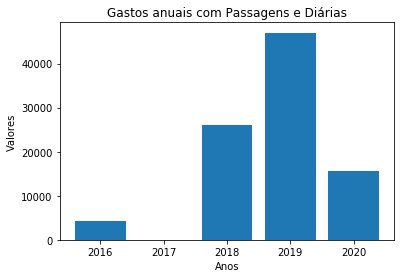

In [26]:
x = np.arange(5)
anos = [
    gastos_2016['VALOR'].sum(),
    gastos_2017['VALOR'].sum(),
    gastos_2018['VALOR'].sum(),
    gastos_2019['VALOR'].sum(),
    gastos_2020['VALOR'].sum(),
]

plt.title('Gastos anuais com Passagens e Diárias')
plt.ylabel('Valores')
plt.xlabel('Anos')
plt.xticks(x, ('2016','2017','2018','2019','2020'))
plt.bar(x, anos)